# Digit Recognition by Multinominal Logistic Regression



## Data

Let's start by load the dataset. In `sklearn.datasets`, we can easily download a digit dataset, like the following cell does:

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()

Let's see the scale of this dataset. We can get the input data by `digits.data` and the output data by `digits.target`.

In [30]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [39]:
X = digits.data
Y = digits.target
print ("Image Data Shape" , X.shape)
print ("Label Data Shape", Y.shape)
X[0]

Image Data Shape (1797, 64)
Label Data Shape (1797,)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

It turns out that there are totally 1797 images in this dataset, and each image is 8 by 8.

We can visualize a image by the following cell.

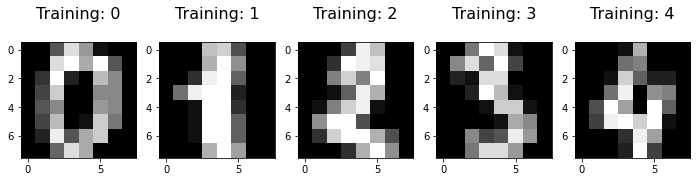

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
for index in range(5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(X[index], (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % Y[index], fontsize = 16)

## Multinominal Logistic Regression Model

Next let's try to generate the multinominal regression model for this porblem.

### Split dataset into training set and test set

First of all, we need to split the dataset into training part and test part.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Setup and fit the multinominal logistic regression model

Now we can setup the model based on `sklearn.linear_model.LogisticRegression`. Then fit the model by training data.

In [35]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

(1437,)


C:\Users\amodh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model assesment

In this part, we do some model assesment. Let's first generate the predictions of the trained model on training set and testing set.

In [26]:
y_train_pred = logistic.predict(X_train)
y_test_pred = logistic.predict(X_test)

With the predictions, we can calculate the confusion matrix for training set and test set.

In [27]:
from sklearn.metrics import confusion_matrix

print ('Confusion matrix on training set:\n', confusion_matrix(y_train, logistic.predict(X_train)))
print ('Confusion matrix on testing set:\n', confusion_matrix(y_test, logistic.predict(X_test)))

Confusion matrix on training set:
 [[151   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0]
 [  0   0   0   0 151   0   0   0   0   0]
 [  0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0 137   0   0   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   0   0   0   0   0   0   0 135   0]
 [  0   0   0   0   0   0   0   0   0 139]]
Confusion matrix on testing set:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In the end, we can calculate the precision and recall for training set and test set.

In [28]:
from sklearn.metrics import classification_report

print ('On training set:\n', classification_report(y_train, logistic.predict(X_train)))
print ('On testing set:\n', classification_report(y_test, logistic.predict(X_test)))

On training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       141
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1.00       151
           5       1.00      1.00      1.00       142
           6       1.00      1.00      1.00       137
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       135
           9       1.00      1.00      1.00       139

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

On testing set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97